In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [ ]:
cd

/root


In [ ]:
cd/ drive

[Errno 2] No such file or directory: '/ drive'
/root


In [ ]:
cd/ content

[Errno 2] No such file or directory: '/ content'
/root


In [ ]:
cd content

[Errno 2] No such file or directory: 'content'
/root


In [ ]:
%cd ../

/


In [ ]:
%cd ./content

/content


In [ ]:
%cd ./drive

/content/drive


In [ ]:
%cd ./MyDrive

/content/drive/MyDrive


In [ ]:
%cd ../

/content/drive/MyDrive


In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 5

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names

In [ ]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

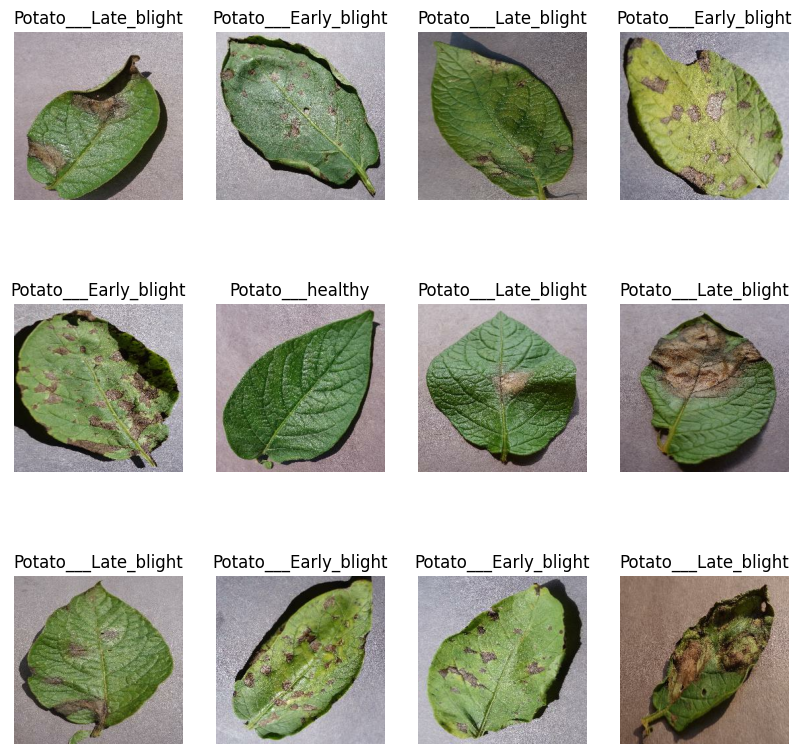

In [ ]:
plt.figure(figsize = (10, 10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [ ]:
len(dataset)

68

In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split= 0.1, test_split = 0.1, shuffle = True, shuffle_size=10000):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed = 12)

  train_size = int(train_split*ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)

  val_ds= ds.skip(train_size).take(val_size)
  test_ds= ds.skip(train_size).skip(val_size)


  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale =  tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
from numpy import resize
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])

model.build(input_shape = input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/5
54/54 [==============================] - 552s 7s/step - loss: 0.9755 - accuracy: 0.4601 - val_loss: 0.8555 - val_accuracy: 0.4792
Epoch 2/5
54/54 [==============================] - 363s 7s/step - loss: 0.8712 - accuracy: 0.5214 - val_loss: 0.7234 - val_accuracy: 0.7448
Epoch 3/5
54/54 [==============================] - 358s 7s/step - loss: 0.6655 - accuracy: 0.6794 - val_loss: 0.3969 - val_accuracy: 0.8229
Epoch 4/5
54/54 [==============================] - 309s 6s/step - loss: 0.3653 - accuracy: 0.8438 - val_loss: 0.2329 - val_accuracy: 0.9375
Epoch 5/5
54/54 [==============================] - 271s 5s/step - loss: 0.3261 - accuracy: 0.8686 - val_loss: 0.2109 - val_accuracy: 0.9219


In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 9s 1s/step - loss: 0.2761 - accuracy: 0.8984


In [ ]:
scores

[0.2760791480541229, 0.8984375]

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/5
54/54 [==============================] - 272s 5s/step - loss: 0.2910 - accuracy: 0.8848 - val_loss: 0.2308 - val_accuracy: 0.9271
Epoch 2/5
54/54 [==============================] - 271s 5s/step - loss: 0.2669 - accuracy: 0.9005 - val_loss: 0.1629 - val_accuracy: 0.9323
Epoch 3/5
54/54 [==============================] - 272s 5s/step - loss: 0.1968 - accuracy: 0.9265 - val_loss: 0.1640 - val_accuracy: 0.9427
Epoch 4/5
54/54 [==============================] - 272s 5s/step - loss: 0.1629 - accuracy: 0.9381 - val_loss: 0.1931 - val_accuracy: 0.9167
Epoch 5/5
54/54 [==============================] - 271s 5s/step - loss: 0.1712 - accuracy: 0.9323 - val_loss: 0.0912 - val_accuracy: 0.9688


In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.8848379850387573,
 0.9004629850387573,
 0.9265046119689941,
 0.9380787014961243,
 0.9322916865348816]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss= history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

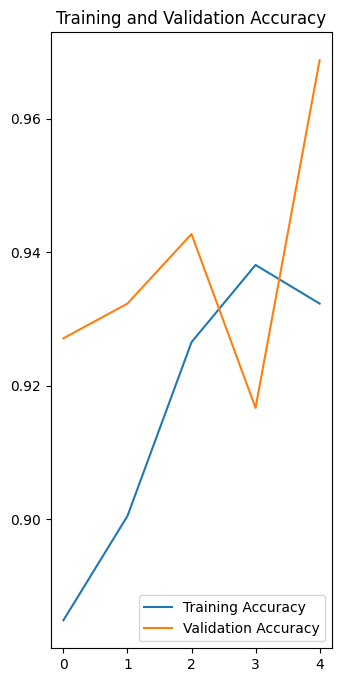

In [ ]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

[[[157 149 160]
  [160 152 163]
  [162 154 165]
  ...
  [172 169 180]
  [173 170 181]
  [173 170 181]]

 [[157 149 160]
  [158 150 161]
  [159 151 162]
  ...
  [167 164 175]
  [168 165 176]
  [168 165 176]]

 [[157 149 160]
  [158 150 161]
  [158 150 161]
  ...
  [169 166 177]
  [170 167 178]
  [169 166 177]]

 ...

 [[ 92  80  90]
  [ 92  80  90]
  [ 93  81  91]
  ...
  [116 106 117]
  [119 109 120]
  [121 111 122]]

 [[ 90  78  88]
  [ 90  78  88]
  [ 91  79  89]
  ...
  [109  99 110]
  [110 100 111]
  [111 101 112]]

 [[ 90  78  88]
  [ 90  78  88]
  [ 91  79  89]
  ...
  [108  98 109]
  [107  97 108]
  [108  98 109]]]
first image to predict
actual label:  Potato___Late_blight
1/1 [==============================] - 1s 1s/step
predicted label:  Potato___Late_blight


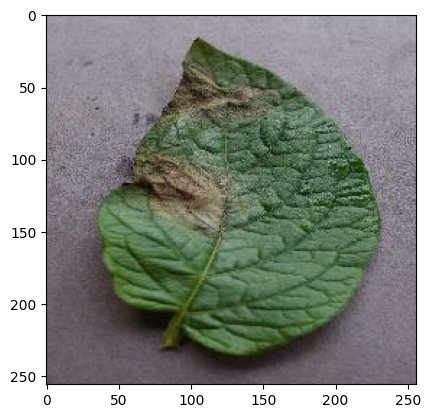

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
  print(images_batch[0].numpy().astype('uint8'))
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label: ", class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted label: ", class_names[np.argmax(batch_prediction[0])])

In [ ]:
from keras.utils.image_utils import img_to_array
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 54ms/step


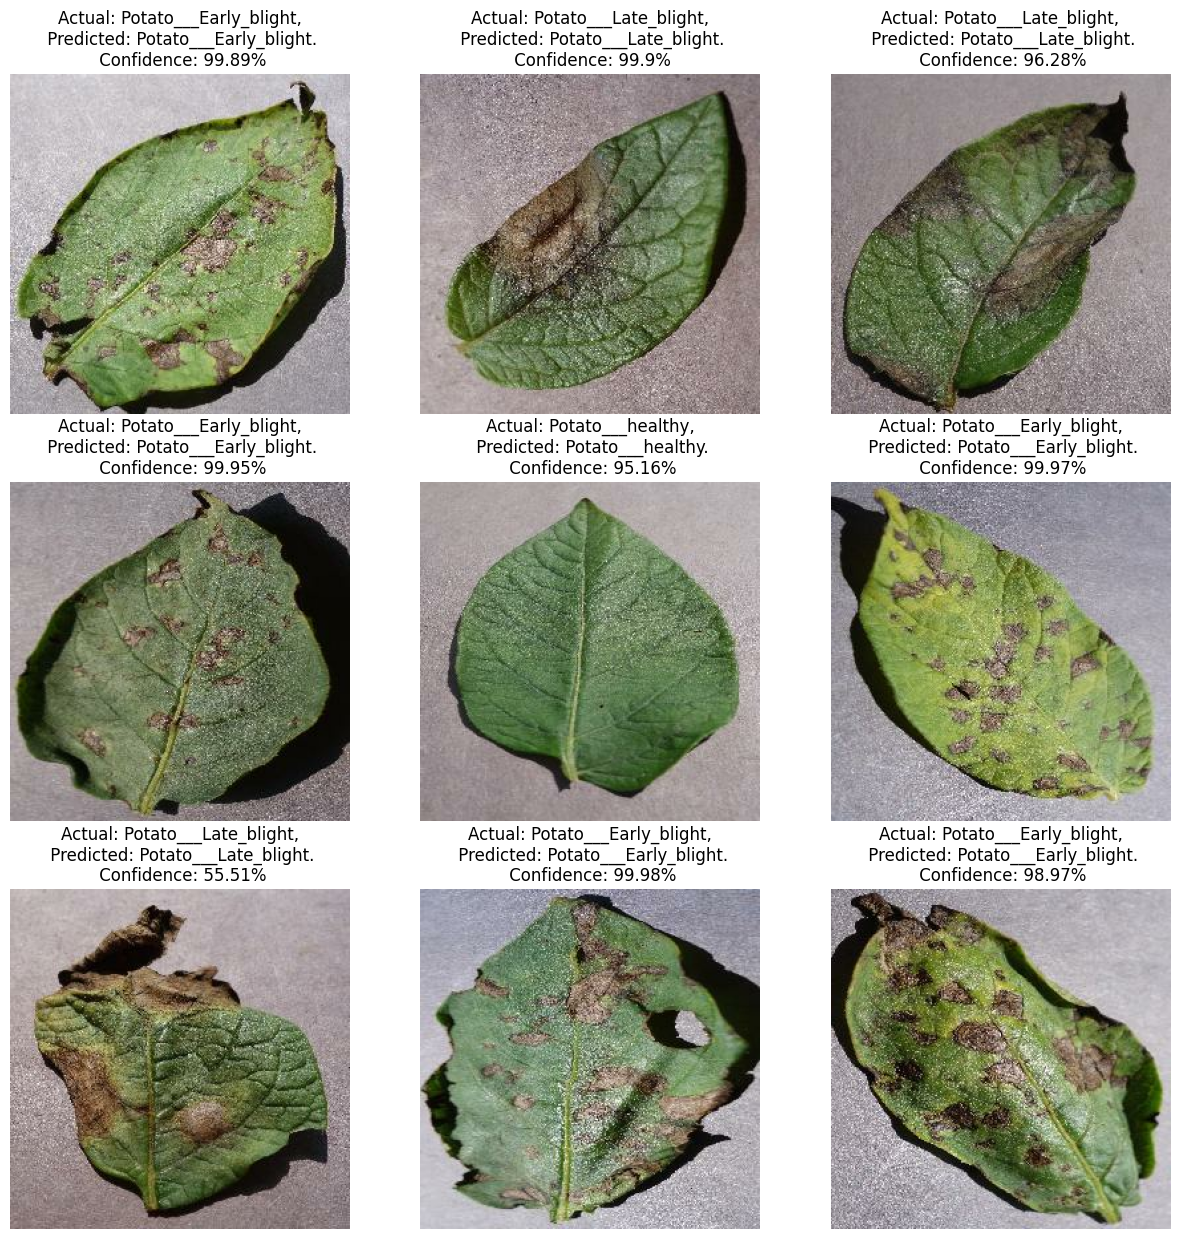

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")


In [ ]:
model_version = 1
model.save(f"./models/{model_version}")

In [ ]:
import os
model_version = max([int(i) for i in os.listdir("./models")+[0]]) + 1
model.save(f"./models/{model_version}")